In [34]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('balance-scale.csv')

df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [16]:
print("Info: \n",df.info())
print()
print("Describe: \n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB
Info: 
 None

Describe: 
          L-Weight  L-Distance    R-Weight  R-Distance
count  625.000000  625.000000  625.000000  625.000000
mean     3.000000    3.000000    3.000000    3.000000
std      1.415346    1.415346    1.415346    1.415346
min      1.000000    1.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000    2.000000
50%      3.000000    3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000    4.000000
max      5.000000    5.000000    5.000000    5.000000


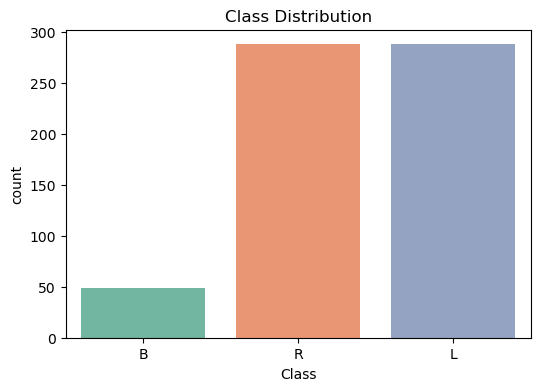

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Class", palette="Set2")
plt.title("Class Distribution")
plt.show()


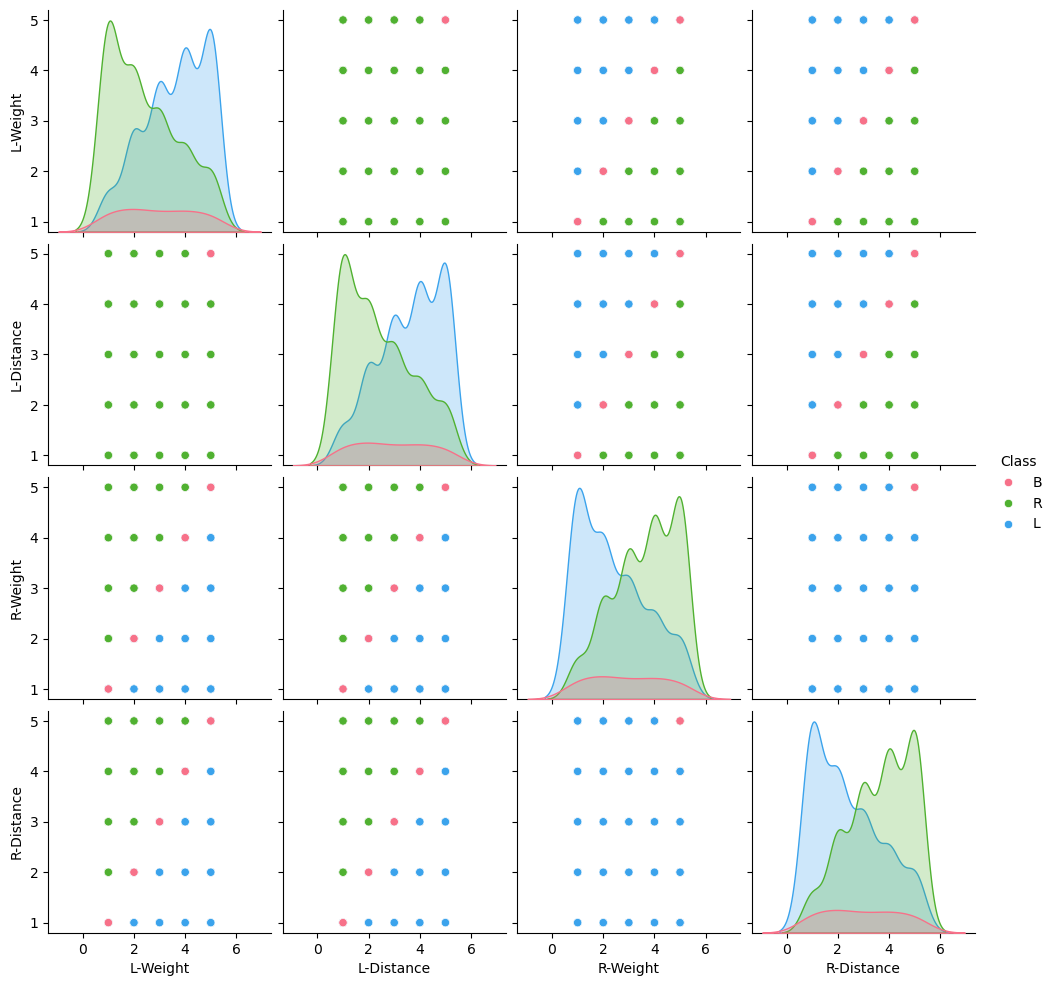

In [23]:
sns.pairplot(df, hue="Class", diag_kind="kde", palette="husl")
plt.show()


In [31]:
X = df.drop(['Class'],axis=1)
y = df['Class']
print(X.shape)
print(y.shape)

(625, 4)
(625,)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn_model.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        11
           L       0.85      0.96      0.91        55
           R       0.89      0.85      0.87        59

    accuracy                           0.82       125
   macro avg       0.58      0.60      0.59       125
weighted avg       0.80      0.82      0.81       125



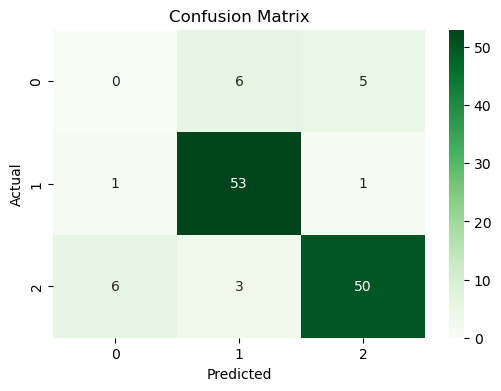

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
print(accuracy_score(y_test,y_pred))

0.824


In [38]:
joblib.dump(scaler,'scaler.pkl')
joblib.dump(knn_model,'knn_model.pkl')
print("Model Saved Successfully!!")

Model Saved Successfully!!
